---
# 2. MT Übung: Kennlinie und Systematische Messabweichung
Dr. rer. nat. Katharina-Sophie Isleif

---

> Bei diesem Tutorial handelt es sich um einen Ansatz nach dem Prinzip
"_learning by doing_".
Es werden einfache Beispiele in der Skript-Sprache _python_ verwendet, um 
konkrete Anwendungen zu verdeutlichen, die auch später in eigenen Arbeiten verwendet
werden können. 
Grundkenntnisse in _python_ sind hilfreich, werden aber nicht zwingend benötigt. 
Kompiliere jede Zelle, die Code enthält, mit _Shift+Enter_ und alle Berechnungen sollten funktionieren.
Es gibt andere Tutorials, um _python_-Kenntnisse oder den Umgang mit den Paketen 
_numpy_ und _matplotlib_ zur Visualisierung und Auswertung von Daten zu vertiefen.

In [1]:
# In diesem Code-Block werden ein paar wichtige Libraries geladen.
# Code-Blocks erkennst du an der Hintergrundfarbe dieser Zelle.
# Einfach mal hier rein klicken und per "Shift+Enter" ausführen. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
%matplotlib inline
%pylab inline
#plt.xkcd() # plots in xkcd-style

Populating the interactive namespace from numpy and matplotlib


---

## Inhalt <a id='Inhalt'> </a>

### [Ü2.1 Dampfdruckthermometer](#Ü21)
    
[Dampfdruckkurve von Wasser](#Ü21.a)

[Empfindlichkeit des Dampfdruckthermometers für Wasser](#Ü21.b)

[Dampfdruckkurve für tiefsiedende Flüssigkeiten](#Ü21.c)

[Empfindlichkeit des Dampfdruckthermometers für tiefsiedende Flüssigkeiten](#Ü21.d)

[Übergang zum Gasthermometer](#Ü21.e)



### [Ü2.2 Systematische Messabweichung](#Ü22)
    
[Schaltung 1: Spannungsrichtige Schaltung](#Ü22.a)

[Schaltung 2: Stromrichtige Schaltung](#Ü22.b)

[Leistungsmessung](#Ü22.c)

---


## Ü2.1 Dampfdruckthermometer <a id="Sec-21"></a> [](#Ü21)

Der Dampfdruck, $p_\mathrm D$, ist der Druck, der sich einstellt, wenn sich in einem abgeschlossenen System ein Dampf mit der zugehörigen flüssigen Phase im thermodynamischen Gleichgewicht befindet. Für verschiedene Temperaturen folgt die Dampfdruckkurve der Exponentialfunktion

$$ p_\mathrm{D} = c \cdot \mathrm{e}^{-\frac{\Delta E}{kT}}$$

wobei $c$ eine Konstante ist, $k = 1,380649\cdot 10^{-23}\,\mathrm{J/K}$ die Boltzmann Konstante und $\Delta E$ die Verdampfungsenergie eines Moleküls.

In [2]:
# Definition der Exp-Funktion in Python-Code
k = 1.380649e-23 # in J/K
def pD(c,dE,T):
    return c * np.exp(-dE/(k*T)) # in bar

Durch Logarithmieren beider Seiten erhält man die äquivalente logarithmische Darstellung

$$\ln{p_\mathrm{D}} = A - B/T$$

wobei $A$ und $B$ wieder die Materialkonstanten sind. 
durch Vergleichen der exponentielle und logarithmischen Schreibweise können die Materialkonstanten ineinander umgerechnet werden:

$$c = \mathrm e^{A}$$
$$\Delta E = B\cdot k$$

In [3]:
# Definition von Funktionen um die Materialkonstanten ineinander umzurechnen
def calc_c(A):
    return np.exp(A)
def calc_dE(B):
    return B*k

### Dampfdruckkurve von Wasser <a id="Ü21.a"> </a>

In der Übung haben wir anhand der gegebenen Dampfdruckkurve in der Abbildung die Materialskonstanten $A$, $B$, $\Delta E$ und $c$ abgeleitet:

In [4]:
# Materialkonstanten für Wasser:
c = 4.5e5 # in bar
dE = 6.74e-20 # in J
A = 13.015 
B = 4882.35 # in K
print('c =', calc_c(A), 'bar')
print('dE =', calc_dE(B), 'J')

c = 449099.614189211 bar
dE = 6.74081164515e-20 J


Als Vergleich plotten wir noch einmal die Dampfdruckkurven mit diesen Parametern:

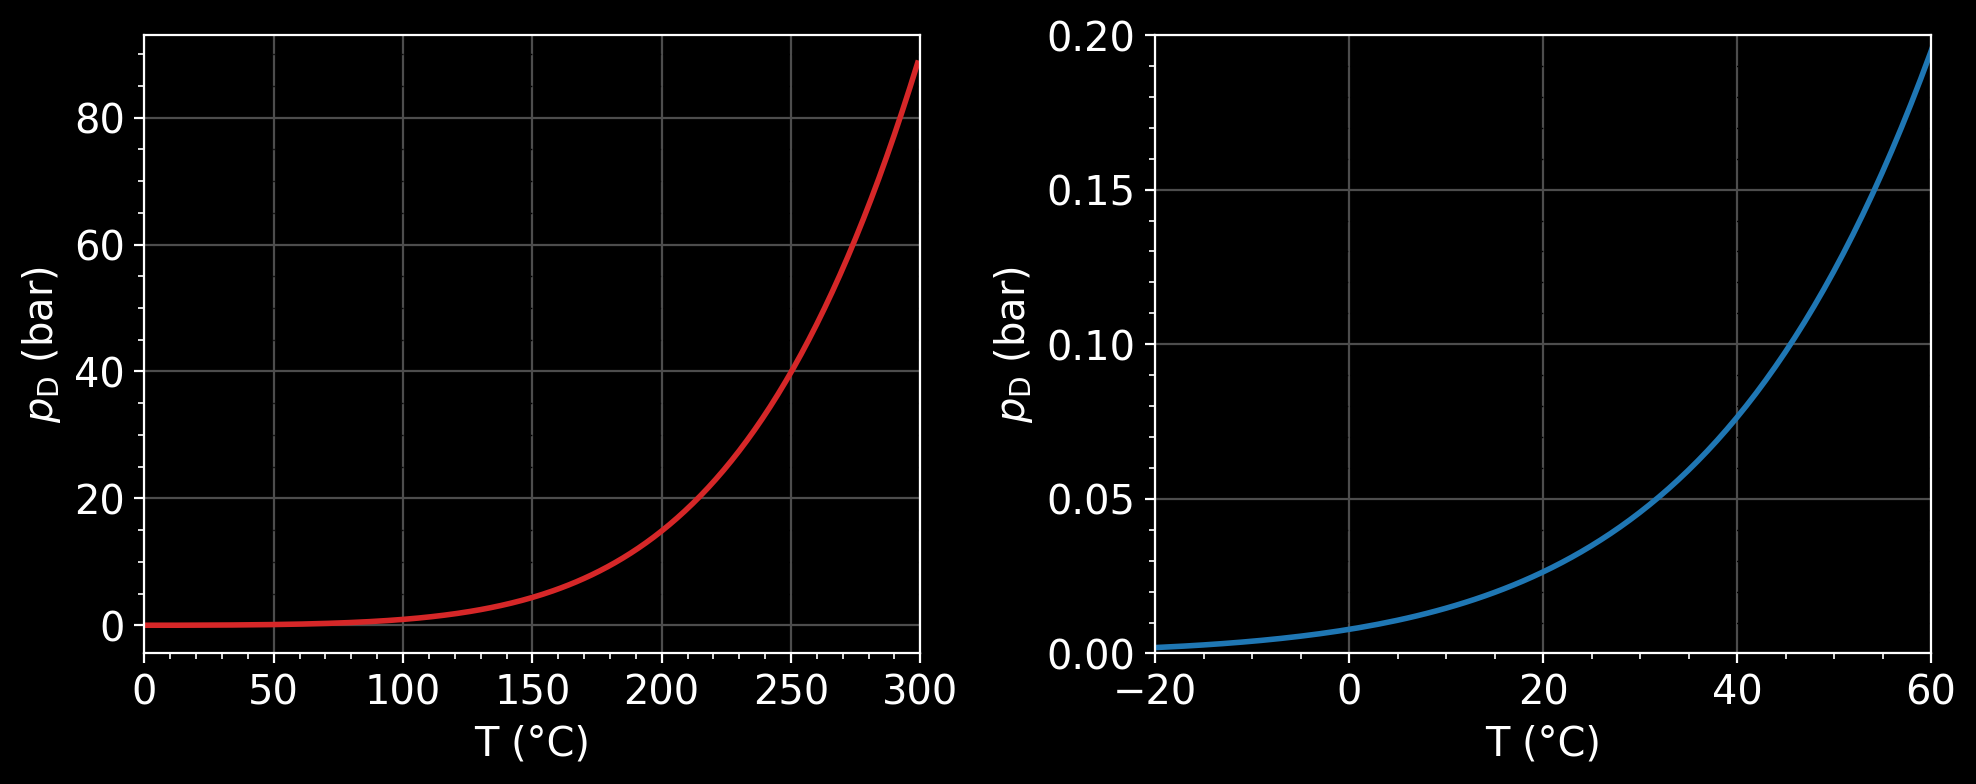

In [5]:
T = np.arange(100e-3,573,1) # Temperatur in K
figure(figsize=(10,4))
ax1 = plt.subplot(121) # Plot für hohe Temperature
ax1.plot(T-273.15, pD(c,dE,T),'tab:red', linewidth=2)
ax1.set_xlim([0,300])
ax1.minorticks_on()
ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax1.set_xlabel('T (°C)')
ax1.set_ylabel(r'$p_\mathrm{D}$ (bar)')

ax2 = plt.subplot(122) # Plot für tiefere Temperaturen
ax2.plot(T-273.15, pD(c,dE,T), 'tab:blue', linewidth=2)
ax2.set_xlim([-20,60])
ax2.set_ylim([0,0.2])
ax2.minorticks_on()
ax2.grid(True, which='both')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax2.set_xlabel('T (°C)')
ax2.set_ylabel(r'$p_\mathrm{D}$ (bar)')
plt.tight_layout()
plt.show()

### Empfindlichkeit des Dampfdruckthermometers für Wasser  <a id="Ü21.b"> </a>

Um die Empfindlichkeit anhand der Kennlinie zu bestimmen, müssen wir die Dampfdruckgleichung von oben ableiten:

In [6]:
# Funktion um pD abzuleiten. 
# Es werden einfach zwei aufeinanderfolgende Funktionswerte analysiert und die Steigung berechnet
def d_pD(c,dE,T): # in bar/K
    h = 1e-5 # in der Theorie wäre h infinitesimal klein (Abstand zwischen zwei Temperaturen)
    return (pD(c,dE,T+h)-pD(c,dE,T))/h

Mit Hilfe dieser einfachen Funktion in Python können wir nun für verschiedene Temperaturen (20°C, 200°C) die Empfindlichkeit eines Dampfdruckthermometers für Wasser bestimmen. Achtung bei den Einheiten für die Temperaturwerte!

In [7]:
T1 = 20 + 273.15 # in Kelvin
T2 = 200 + 273.15 # in Kelvin
print('T =  ', T1-273.15, '°C: ', d_pD(calc_c(A),calc_dE(B), T1), 'bar/K')
print('T = ', T2-273.15, '°C: ', d_pD(calc_c(A),calc_dE(B), T2), 'bar/K')

T =   20.0 °C:  0.0014918014015069534 bar/K
T =  200.0 °C:  0.3232712346701305 bar/K


### Dampfdruckkurve für tiefsiedende Flüssigkeiten <a id="Ü21.c"> </a>

Um die Empfindlichkeit eines Dampfdruckthermometers bei tiefen Temperaturen zu verbessern wird Wasser durch eine tiefsiedende Flüssigkeit ausgetauscht. Je nach gewünschter Temperatur können hier zum Beispiel Sauerstoff (für 54K - 94K), Stickstoff (für 63K - 84K), Neon (für 24K - 40K) und Wasserstoff (13K - 25K) zum Einsatz kommen. 

Die Materialkonstanten $A$ und $B$ sind im folgenden Code-Block für jede Flüssigkeit angegeben. 

In [8]:
A_O2 = 5.961546 # Materialkonstanten für Sauerstoff
B_O2 = 467.45576 # in K

A_N2 = 5.893271 # Materialkonstanten für Stickstoff
B_N2 = 403.96046 # in K

A_Ne = 4.61152 # Materialkonstanten für Neon
B_Ne = 106.3851 # in K

A_H2 = 1.711466 # Materialkonstanten für Wasserstoff
B_H2 = 44.01046 # in K

A_He = 2.24846 # Materialkonstanten für Helium
B_He = 2.49174

Um ein Vergleich der unterschiedlichen Flüssigkeiten sichbar zu machen, werden die Dampfdruckkurven anhand der Materialkonstanten und der oben gegebenen Gleichung geplottet:

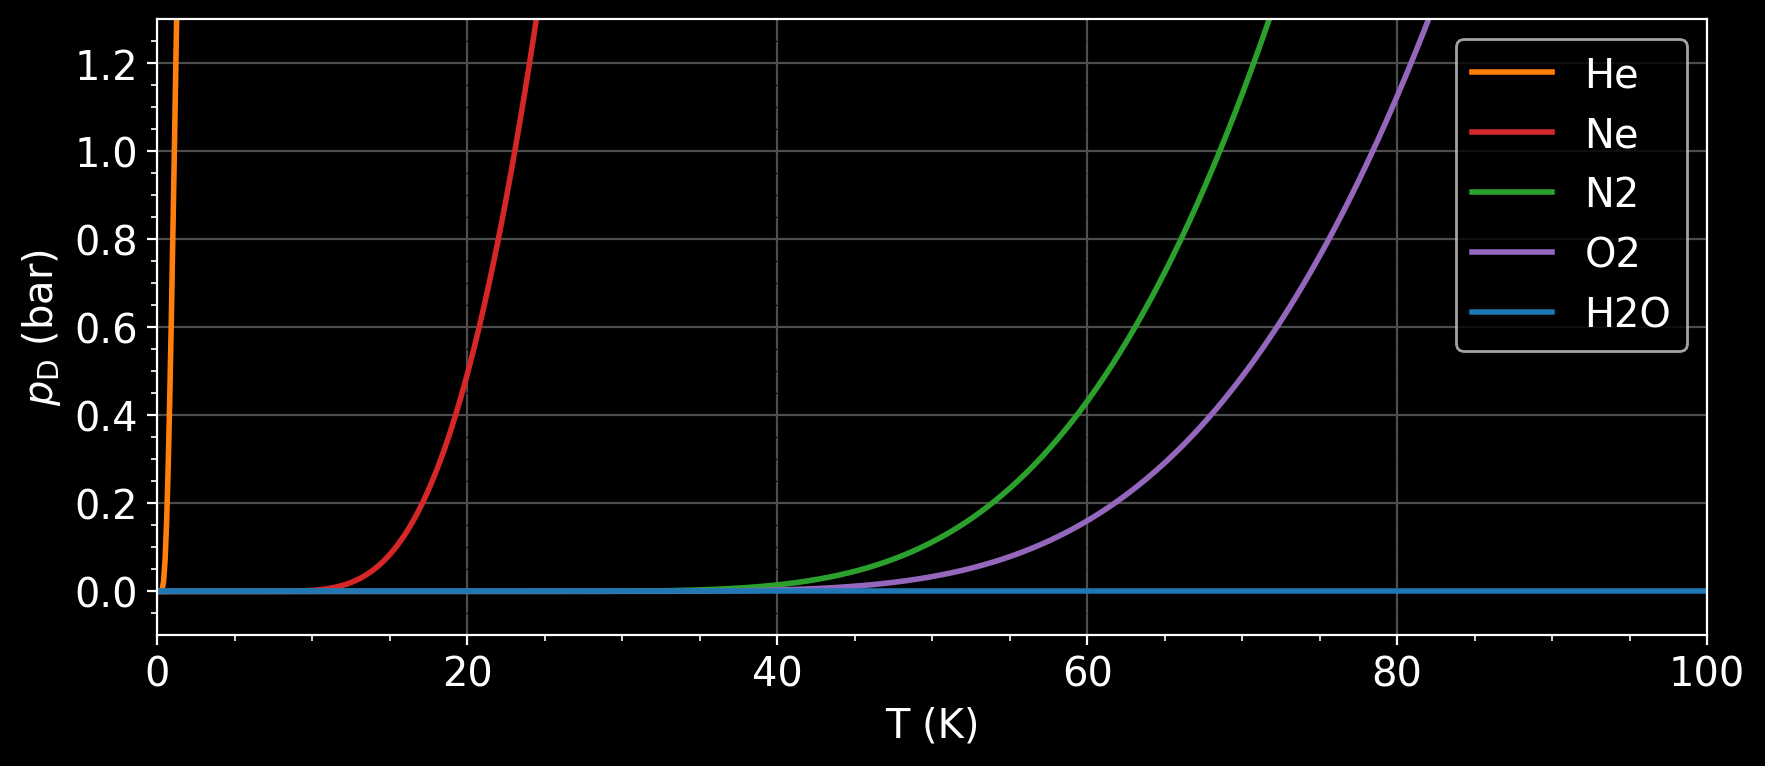

In [9]:
T = np.arange(10e-3,110,0.1) # Temperatur in K
figure(figsize=(10,4))
ax1 = plt.subplot(111) # Plot für hohe Temperature
#ax1.plot(T, pD(calc_c(A_H2),calc_dE(B_H2),T),'tab:green', linewidth=2, label='H2')
ax1.plot(T, pD(calc_c(A_He),calc_dE(B_He),T),'tab:orange', linewidth=2, label='He')
ax1.plot(T, pD(calc_c(A_Ne),calc_dE(B_Ne),T),'tab:red', linewidth=2, label='Ne')
ax1.plot(T, pD(calc_c(A_N2),calc_dE(B_N2),T),'tab:green', linewidth=2, label='N2')
ax1.plot(T, pD(calc_c(A_O2),calc_dE(B_O2),T),'tab:purple', linewidth=2, label='O2')
ax1.plot(T, pD(calc_c(A),calc_dE(B),T),'tab:blue', linewidth=2, label='H2O')
ax1.set_xlim([0,100])
ax1.set_ylim([-0.1,1.3])
ax1.minorticks_on()
ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax1.set_xlabel('T (K)')
ax1.set_ylabel(r'$p_\mathrm{D}$ (bar)')
ax1.legend()
plt.show()

Bei tiefen Temperaturen müssen eigentlich weitere Materialkonstanten hinzugezogen werden, damit die Dampfdruckkurve die experimentell ermittelten Werte tatsächlich widerspiegelt. Uns soll an dieser Stelle allerdings die Genauigkeit der Kennlinie unter Berücksichtigung von nur 2 Materialkonstanten vorerst genügen, da sie sich in der richtigen Größenordnung befinden.

Der Graph verdeutlicht, für welchen Temperaturbereich welche Flüssigkeit benutzt werden sollte, um mittels Dampfdruckverfahren eine möglichst genaue Temperaturmessung zu erhalten. 

### Empfindlichkeit des Dampfdruckthermometers für tiefsiedende Flüssigkeiten <a id="Ü21.d"> </a>

Wie oben definiert, können wir die Ableitung der Dampfdruckkurve an bestimmten Temperaturen berechnen um die Empfindlichkeit zu bestimmen:

In [10]:
T1 = 1 # in Kelvin
print('He-Dampfdruckthermometer bei T =  ', T1, 'K: ', d_pD(calc_c(A_He),calc_dE(B_He), T1), 'bar/K')
T1 = 20 # in Kelvin
print('Ne-Dampfdruckthermometer bei T =  ', T1, 'K: ', d_pD(calc_c(A_Ne),calc_dE(B_Ne), T1), 'bar/K')

He-Dampfdruckthermometer bei T =   1 K:  1.9536584054846704 bar/K
Ne-Dampfdruckthermometer bei T =   20 K:  0.1310556564215748 bar/K


### Übergang zum Gasthermometer <a id="Ü21.e"> </a>

Das Wasser-Dampfdruckthermometer besteht aus einen Gefäß mit einem Volumen von 1 Liter und einer Druckfestigkeit von 50 bar. Aus Sicherheitsgründen wird beim Bau des Thermometers nur soviel Flüssigkeit eingefüllt, dass bei einer Temperatur von 250°C die ganze Flüssigkeit verdampft ist. Dadurch liegt uns nun ein "normales" Gasthermometer vor, dessen physikalisches Verhalten durch das ideale Gasgesetz

$$ p \cdot V = N \cdot k \cdot T$$

beschrieben wird. Für das Volumen gilt $V = 1\,\mathrm l = 1\,\mathrm{dm}^3 = 1\cdot 10^{-3}\,\mathrm m^3$ und für den Druck bei $T=250\,^\circ \mathrm C = 523.15\,\mathrm K$ gilt $p = 40\,\mathrm{bar} = 40\cdot 10^5\,\mathrm{Pa}$.

In [11]:
V = 1e-3 # in m^3
T = 250 + 273.15 # in K
p = 40e5 # in Pa
N = p*V/(k*T)
print(N, 'Moleküle')

5.537968472552744e+23 Moleküle


Dies entspricht fast der Avogadro-Konstanten $N_A = 6.022\cdot 10^{23}/\,\mathrm{mol}$, welche die Anzahl von Molekülen in 1 mol definiert.

In [12]:
N_A = 6.02214086e23 # in mol^-1
Mol = N / N_A
print(Mol, 'mol')

0.919601284874752 mol



Die molare Masse von Wasser ergibt sich mithilfe von Gleichung:

$$M_\mathrm{H2O} = 2M_\mathrm H + 1M_\mathrm O$$

wobei $M_H = 1.00794\,\mathrm{\frac{g}{mol}}$ und $M_H = 15.994\,\mathrm{\frac{g}{mol}}$

In [13]:
M_H20 = 2 * 1.00794 + 1 * 15.994
print('Molare Masse von Wasser: ', M_H20, 'g/mol')

Molare Masse von Wasser:  18.00988 g/mol


Bezogen auf unsere eben berechnete Mol-Größe ergibt sich also folgende Masse:

In [14]:
m_H2O = M_H20 * Mol
print(m_H2O, 'g')

16.561908788440096 g


Dies können wir nun mittels der Dichte von Wasser, $\rho = 1000\,\mathrm{\frac{kg}{m^3}} = 1000\,\mathrm{\frac{g}{l}}$ in ein Volumen umrechnen:

In [15]:
r = 1000 # in g/l
V_H2O = m_H2O / r
print('Es werden demnach ',V_H2O*1000, 'ml Flüssigkeitsmenge benötigt, damit bei 250°C alles verdampft ist.')

Es werden demnach  16.561908788440096 ml Flüssigkeitsmenge benötigt, damit bei 250°C alles verdampft ist.


Auch bei 300°C kann mit dem Thermometer noch gemessen werden, es handelt sich dann allerdings nicht mehr um ein Dampfdruckthermometers, sondern lediglich um ein Gasthermometer. Bei gleichbleibenden Volumen (abgeschlossenes System) gilt also folgende Gleichung:

$$\frac{p_1}{T_1} = \frac{p_2}{T_2}$$

mittels welcher wir den Druck bei 300°C bestimmen können.

In [16]:
p1 = 40 #in bar
T1 = 250 + 273.15 #in K
T2 = 300 + 273.15 #in K
p2 = T2/T1*p1
print(p2, 'bar')

43.822995316830735 bar


Um die Empfindlichkeit eines Gasthermometers zu bestimmen, wird die (ideale) Gasgleichung entsprechend umgestellt und nach der Temperatur abgeleitet:

$$p = \frac{NkT}{V} \quad \rightarrow \quad \frac{dp}{dT} = \frac{Nk}{V}$$

In [17]:
E = N*k/V # Achtung Einheiten!!
print('Empfindlichkeit = ', E, 'J / K m^3 ')
print('                = ', E, 'Pa / K' )
print('                = ', E/1e5, 'bar / K' )
print('                = ', E/1e5*1e3, 'mbar / K' )

Empfindlichkeit =  7645.990633661474 J / K m^3 
                =  7645.990633661474 Pa / K
                =  0.07645990633661474 bar / K
                =  76.45990633661475 mbar / K


Durch die Ableitung ist die Temperaturabhängigkeit verschwunden. Damit ist die Empfindlichkeit eines Gasthermometers konstant und beträgt etwa 76.5 mbar / K.

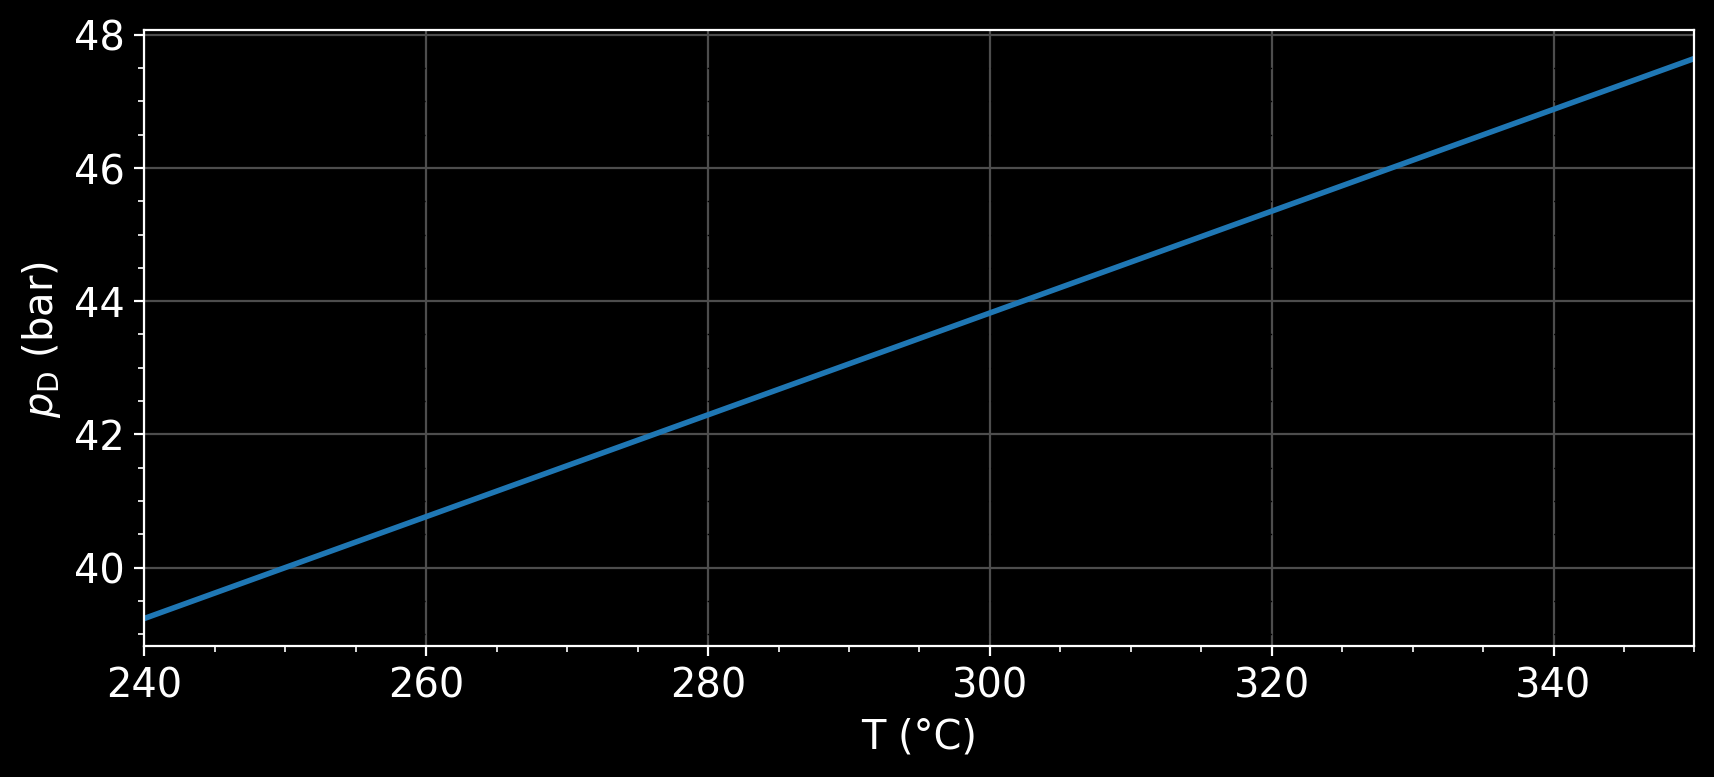

In [18]:
T = np.arange(240+273.15,351+273.15,1) # Temperatur in K
figure(figsize=(10,4))
ax1 = plt.subplot(111) # Plot für hohe Temperature
ax1.plot(T-273.15, N*k*T/V/1e5,'tab:blue', linewidth=2)
ax1.minorticks_on()
ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax1.set_xlim([240,350])
ax1.set_xlabel('T (°C)')
ax1.set_ylabel(r'$p_\mathrm{D}$ (bar)')
plt.show()

## Ü2.2 Systematische Messabweichung <a id="Sec-22"></a> [](#Ü22)

Messgeräte können die genaue Messung von elektrischen Größen beeinflussen. Je nachdem, ob die Stromstärke I oder die Spannung U besonders genau gemessen werden soll, müssen die Messgeräte entsprechend geschaltet sein. 

### Schaltung 1: Spannungsrichtige Schaltung  <a id="Ü22.a"> </a>

Möchte man einen systematischen Fehler bei der Spannungsmessung vermeiden, so wählt man die spannungsrichtige Schaltung. Bei der spannungsrichtigen Messung wird nur die über dem Bauteil (Widerstand R) abfallende Spannung UR gemessen. Da kein weiteres Bauteil die Messung beeinflusst, wird hier die Spannung korrekt gemessen.

In [23]:
Image("schaltung1.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

Der unkorrigierte Widerstandswert berechnet sich aus 

$$ R = \frac{U}{I}$$

In [20]:
U = 10
I = 2.4e-3
RiA = 4
RiV = 10e3
R = U/I # unkorrigierter Widerstandswert
print('Der unkorrigierte Widerstandswert ist R =', R, 'Ohm')

Der unkorrigierte Widerstandswert ist R = 4166.666666666667 Ohm


Allerdings registriert das Strommessgerät in dieser Schaltung nicht nur den Strom IR, der durch den Widerstand fließt, sondern auch den durch das Messgerät fließenden Strom IV: 

$$I_V = \frac{U}{R_{iV}}$$

In [21]:
IV = U/RiV # Strom, welcher über den Spannungsmesser abfließt
print('Der Strom der durch das Spannungsmessgerät fließt ist IV =', IV, 'A')

Der Strom der durch das Spannungsmessgerät fließt ist IV = 0.001 A


Die Strommessung ist in dieser Schaltung mit einem systematischen Fehler behaftet. Die Strommessung muss entsprechend korrigiert werden: 

$$I_R = I - I_V$$

In [22]:
IR = I - IV # korrigierter Stromwert, welcher über R abfließt
print('Korrektur der Strommessung liefert IR =', IR, 'A')

Korrektur der Strommessung liefert IR = 0.0013999999999999998 A


Dadurch lann der korrigierte Widerstandswert bestimmt werden:

$$ R_k = U / I_R $$

In [32]:
Rk = U/IR # korrigierter Widerstandswert
print('Der korrigierte Widerstandswert lautet R =', Rk, 'Ohm')

Der korrigierte Widerstandswert lautet R = 7142.857142857144 Ohm


Der absolute Fehler der Widerstandsmessung beträgt somit

$$A = R - R_k = \Delta R$$

undfür den relativen Fehler bezogen auf den Messwert folgt:

$$A_\mathrm{rel} = A/R_k.$$

In [33]:
A = R - Rk # absoluter systematischer Fehler
Arel = A/Rk * 100 # relativer systematischer Fehler
print('Der absolute Fehler beträgt: ', A, 'Ohm')
print('Der relative Fehler beträgt: ', Arel, '%')

Der absolute Fehler beträgt:  -2976.190476190477 Ohm
Der relative Fehler beträgt:  -41.66666666666667 %


Der Fehler kann durch einen hohen Eingangswiderstand des Messgerätes von einigen MΩ gering gehalten werden. Dadurch wird auch der durch den Spannungsmesser fließende Strom klein.

### Schaltung 2: Stromrichtige Schaltung <a id="Ü22.b"> </a>

Bei der stromrichtigen Messung wird nur der durch ein Bauteil (Widerstand R) fließende Strom gemessen. Dazu wird der Strom ohne Verzweigung unmittelbar vor oder hinter dem Bauteil gemessen. In dieser Schaltung wird die Stromstärke IR korrekt gemessen.

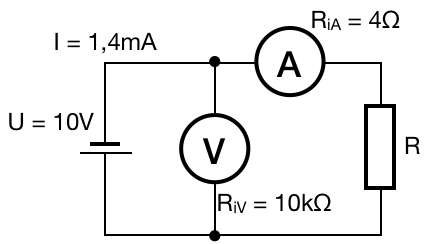

In [34]:
Image("schaltung2.png")

Der unkorrigierte Widerstandswert berechnet sich aus 

$$ R = \frac{U}{I}$$

In [35]:
U = 10
I = 1.4e-3
RiA = 4
RiV = 10e3
R = U/I # unkorrigierter Widerstandswert
print('Der unkorrigierte Widerstandswert ist R =', R, 'Ohm')

Der unkorrigierte Widerstandswert ist R = 7142.857142857143 Ohm


Das Spannungsmessgerät registriert in dieser Schaltung nicht nur die an R abfallende Spannung UR, sondern auch die über dem Strommessgerät abfallende Spannung UA:

$$U_A = R_{iA} \cdot I$$

In [36]:
UA = RiA*I # Spannungsabfall am Strommessgerät
print('Die Spannung, die über dem Strommessgerät abfällt ist UA =', UA, 'V')

Die Spannung, die über dem Strommessgerät abfällt ist UA = 0.0056 V


Die Spannungsmessung ist also in dieser Schaltung mit einem systematischen Fehler behaftet, welcher vom eigentlichen Spannungswert abgezogen werden muss:

$$U_R = U - U_A.$$

In [37]:
UR = U - UA # korrigierter Spannungswert über R
print('Korrektur der Spannungsmessung liefert UR =', UR, 'V')

Korrektur der Spannungsmessung liefert UR = 9.9944 V


Dadurch kann der korrigierte Widerstandswert bestimmt werden:

$$R_k = U_R/I$$

In [38]:
Rk = UR/I # korrigierter Widerstandswert
print('Der korrigierte Widerstandswert lautet R =', Rk, 'Ohm')

Der korrigierte Widerstandswert lautet R = 7138.857142857143 Ohm


Die absolute Abweichung der Widerstandsmessung berechnet sich über:

$$ A = R - R_k = \Delta R$$

und die relative Abweichung bezogen auf den Messwert zu

$$A_\mathrm{rel} = \frac{A}{R_k}$$

In [39]:
A = R - Rk # absoluter systematischer Fehler
Arel = A/Rk * 100 # relativer systematischer Fehler
print('Der absolute Fehler beträgt: ', A, 'Ohm')
print('Der relative Fehler beträgt: ', Arel, '%')

Der absolute Fehler beträgt:  4.0 Ohm
Der relative Fehler beträgt:  0.05603137757144001 %


Um die Abweichung möglichst gering zu halten, muss der Innenwiderstand des Strommessers möglichst gering sein. Dadurch wird auch die über dem Strommesser abfallende Spannung UA klein.

### Leistungsmessung <a id="Ü22.c"> </a>

Im Gleichstromkreis werden gleichzeitig Strom- und Spannungsmessung mit einer stromrichtigen Messschaltung an einem Widerstand R durchgeführt. Die Strommessung liefert I = 140mA, die Spannungsmessung U = 10V. 
Über die Gleichung für die Leistung kann das unberichtigte Ergebnis für die Leistungsmessung bestimmt werden:

In [40]:
U = 10
I = 200e-3
RiA = 4
P = U*I
print('Die Leistung beträgt P = ', P, 'W')

Die Leistung beträgt P =  2.0 W


Allgemein gilt für die die Abweichung der indirekten Messung, also der Fortpflanzung der bekannten systematischen Abweichung:

$$ \Delta y = \sum_{i=1}^n\frac{\partial y}{\partial x_i}\cdot \Delta x_i $$

bezogen auf die Bestimmungsgleichung der Leistung:

$$ \Delta P = \frac{\partial P}{\partial U} \Delta U + \frac{\partial P}{\partial I} \Delta I $$

nach Ausführung der partiellen Differentiation ergibt sich:

$$ \Delta P = I \cdot \Delta U + U \cdot \Delta I $$

weil eine stromrichtige Messung verwendet wird, tritt keine systematische Abweichung bezüglich des Stromes auf, d. h. $\Delta 􏰀I = 0$, somit vereinfacht sich die Gleichung zu:

$$ \Delta P = I \cdot \Delta U $$

Das Voltmeter zeigt eine Spannung an, die der Summe der Spannung über RiV und der Spannung über dem Strommesser entspricht. Die Spannung über dem Strommesser darf für die Berechnung der Leistung über R nicht mit herangezogen werden, sie ist in unserem Fall identisch mit der systematischen Abweichung:

$$ \Delta P = I \cdot \Delta U  = I \cdot U_\mathrm{iA} = I \cdot I \cdot R_\mathrm{iA}$$

In [41]:
dP = I**2 * RiA
print('Die systematische Abweichung der Leistung beträgt dP = ', dP, 'W')
print('Die korrigierte Leistung ist: Pk = ',P-dP, 'W')

Die systematische Abweichung der Leistung beträgt dP =  0.16000000000000003 W
Die korrigierte Leistung ist: Pk =  1.8399999999999999 W
